In [4]:
import numpy as np 
from numpy import sin, cos
from math import atan2
from pydrake.all import LeafSystem, BasicVector
from pydrake.systems.framework import Context, ContinuousState
from pydrake.all import LogVectorOutput, DiagramBuilder, Simulator

import sys
sys.path.append("../")

from src.LauncherFunct.PlanarPRR_launcher import PlanarPRR_Controller
from src.plant.PRR import PlanarPRR

import matplotlib.pyplot as plt


In [6]:
def mapping_q_to_theta(q):
    theta1 = q[0] + cos(q[1]) + cos(q[1]+q[2])
    theta2 = + sin(q[1]) + sin(q[1]+q[2])
    theta3 = q[2]
    return np.array([theta1, theta2, theta3, 0,0,0])

In [7]:

builder = DiagramBuilder()

plant = builder.AddSystem(PlanarPRR())
planar_controller_diagram, component, planar_controller_context = PlanarPRR_Controller()
controller = builder.AddSystem(planar_controller_diagram)


builder.Connect(plant.get_output_port(), controller.get_input_port()) # q_vect

logger_q = LogVectorOutput(plant.get_output_port(), builder)
logger_controller = LogVectorOutput(controller.get_output_port(0), builder)
logger_theta = LogVectorOutput(controller.get_output_port(1), builder)

# F --- plant F
# here wase planar_controller_diagram
builder.Connect(controller.get_output_port(0), plant.get_input_port(0))
# copy F to our input

BigDiagram = builder.Build()

root_context = BigDiagram.CreateDefaultContext()
controller_context = controller.GetMyContextFromRoot(root_context)
plant_context = plant.GetMyContextFromRoot(root_context)
cartesian_controller_context = component['cartesian controller'].GetMyContextFromRoot(root_context)

q_state = np.array([0, -0.4, 1.1, 0, 0, 0])
theta_state = mapping_q_to_theta(q_state)
plant_context.SetContinuousState(q_state)

controller_context.SetContinuousState(theta_state)
component['cartesian controller'].get_input_port_desired_state().FixValue(cartesian_controller_context, np.array([2, 0.9, 0, 0]))


simulator = Simulator(BigDiagram, root_context)
simulator.AdvanceTo(15.0)



1.6859031812873735 0.2547993449290406
1.6859031812873735 0.2547993449290406
1.6859031812873735 0.2547993449290406
1.6859031915695606 0.2547994271340049
1.6859031864383922 0.25479938598236757
1.6859031864383922 0.25479938598236757
1.685903212218086 0.25479959112659656
1.6859034965348563 0.25480184403609235
1.685903368496306 0.2548008140330396
1.685903368496306 0.2548008140330396
1.6859041528300505 0.2548069135642632
1.6859115811538103 0.254863298098951
1.685908406355542 0.25483740534422267
1.685908406355542 0.25483740534422267
1.6859142422910685 0.25487822454234993
1.6859337034927795 0.25500333404553593
1.68592718142754 0.2549595004769819
1.68592718142754 0.2549595004769819
1.6859402189674877 0.2550400433400004
1.685968361814175 0.25519538112222645
1.6859610143269073 0.2551565022927458
1.6859610143269073 0.2551565022927458
1.6859818737289551 0.255272317125287
1.6860188532868865 0.2554545906398353
1.6860109283266203 0.25542005988449934
1.6860109283266203 0.25542005988449934
1.68604001897

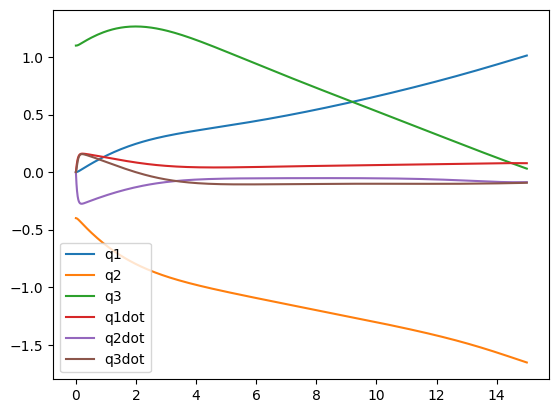

In [8]:
log_q = logger_q.FindLog(root_context)
log_F = logger_controller.FindLog(root_context)
log_theta = logger_theta.FindLog(root_context)

time_vect = log_q.sample_times()

plt.plot(time_vect, log_q.data()[0].transpose(), label='q1')
plt.plot(time_vect, log_q.data()[1].transpose(), label="q2")
plt.plot(time_vect, log_q.data()[2].transpose(), label='q3')
plt.plot(time_vect, log_q.data()[3].transpose(), label='q1dot')
plt.plot(time_vect, log_q.data()[4].transpose(), label='q2dot')
plt.plot(time_vect, log_q.data()[5].transpose(), label='q3dot')

plt.legend()


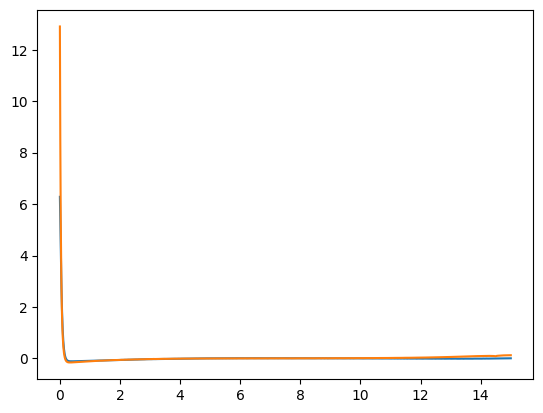

In [9]:

plt.plot(time_vect, log_F.data()[0].transpose())
plt.plot(time_vect, log_F.data()[1].transpose())


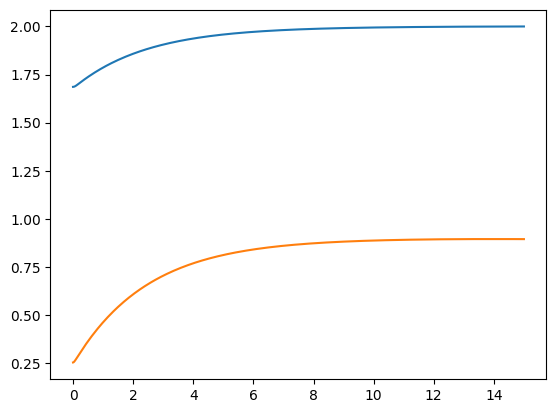

In [10]:

plt.plot(time_vect, log_theta.data()[0].transpose())
plt.plot(time_vect, log_theta.data()[1].transpose())
